# Task 1 : Data preparation and customer analytics
Perform an analysis of your client's transaction dataset to uncover patterns in customer purchasing behaviors, extract valuable insights, and offer strategic commercial recommendations.

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

## 1. Cleaning the data 

In [2]:
# Reading data
trans_data = pd.read_excel('QVI_transaction_data.xlsx')
trans_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [3]:
# Data.info
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### 2）Datatype correction

In [4]:
# 'DATE' is not in the correct format
trans_data["DATE"] = pd.to_datetime(trans_data["DATE"], origin="1899-12-30",unit="D")
trans_data['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

### 3）Removing irrelevant values

In [5]:
# Generate a summary of the PROD_NAME column
trans_data["PROD_NAME"].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [6]:
# Removing all digits and special characters such as '&' and splitting the words
PROD_word = trans_data["PROD_NAME"].str.replace('([0-9]+[gG])','').str.replace('[^\w]', ' ').str.split()

# Calculating the recurrence of the data and finding the most sold products
PROD_CNT = pd.value_counts([word for name in PROD_word
                                for word in name]).sort_values(ascending=False)  
PROD_CNT.head()

Chips     49770
Kettle    41288
Smiths    28860
Salt      27976
Cheese    27890
dtype: int64

In [7]:
# Remove salsa
trans_data = trans_data.drop(trans_data[trans_data["PROD_NAME"]=="[Ss]alsa"].index)

### 4）Handling missing values and outlines

In [8]:
# Checking for outliers
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [9]:
trans_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [10]:
trans_data.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

# Segmentation

In [11]:
trans_data.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [12]:
num=['STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_QTY','TOT_SALES']
cat=['PROD_NAME']

# Univariate Analysis

# Histogram

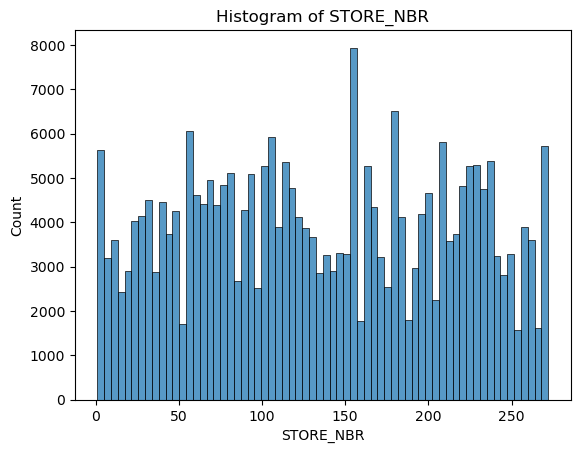

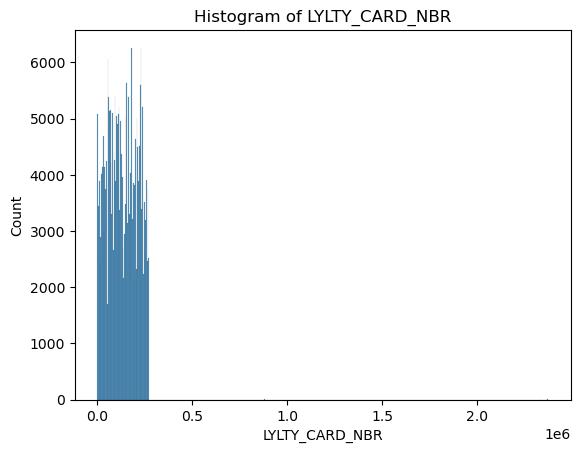

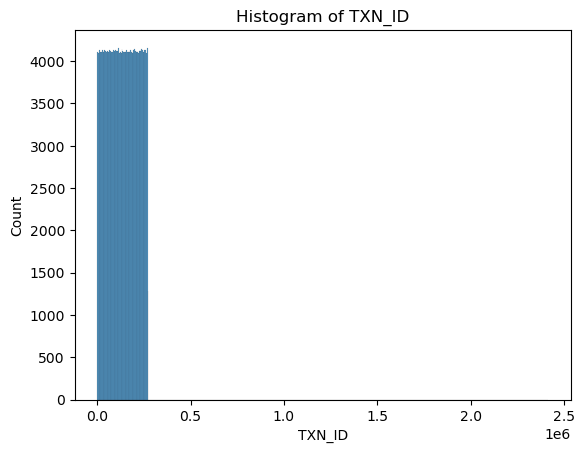

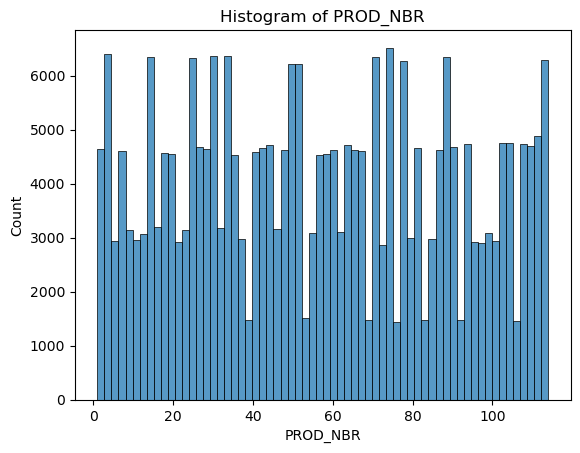

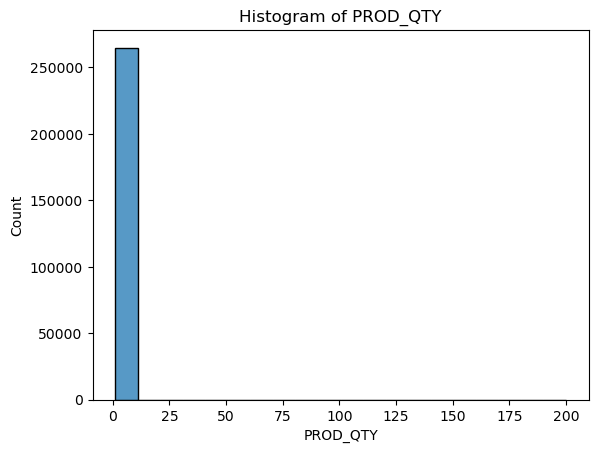

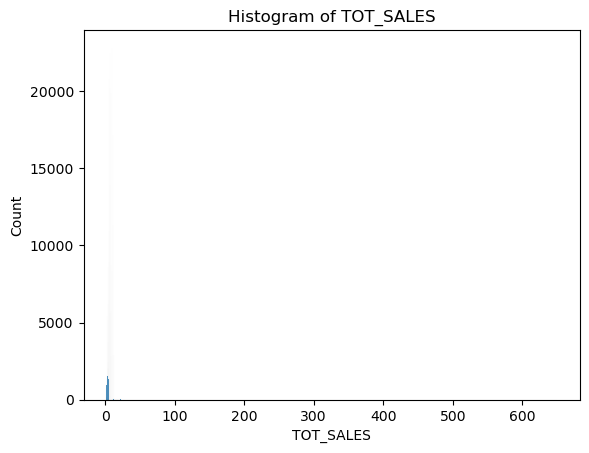

In [13]:
for i in num:
    sns.histplot(trans_data[i])
    plt.title("Histogram of "+i)
    plt.show()

# Boxplot

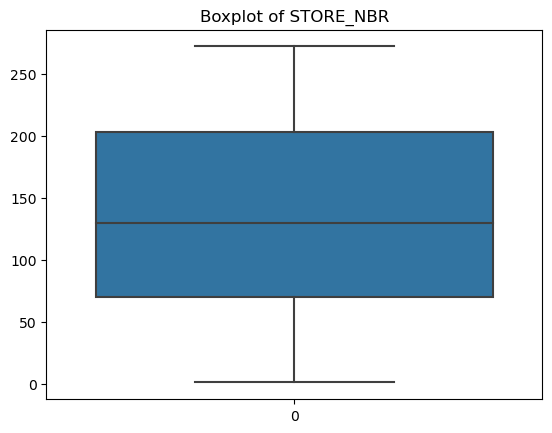

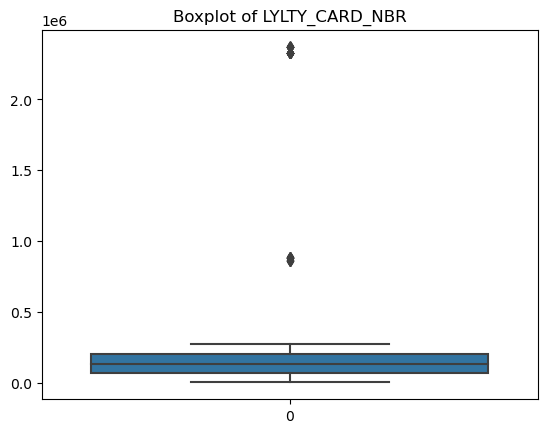

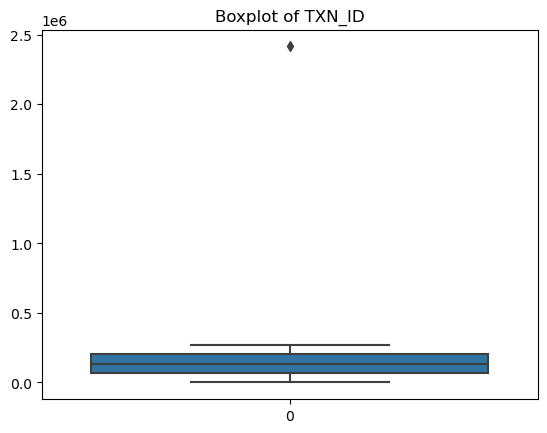

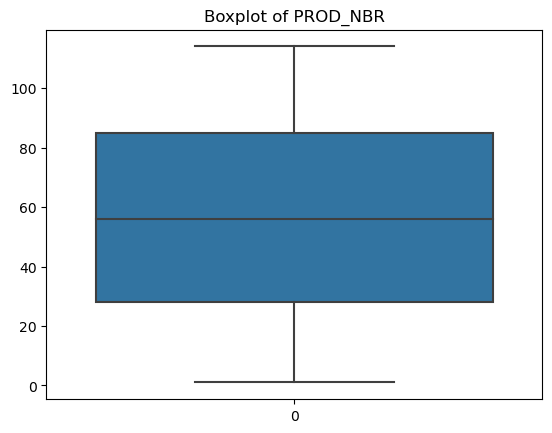

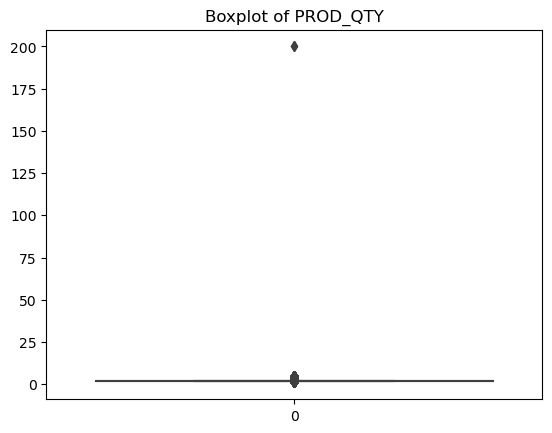

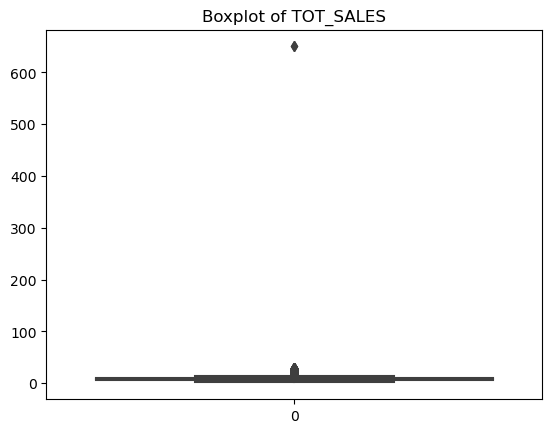

In [14]:
for i in num:
    sns.boxplot(trans_data[i])
    plt.title("Boxplot of "+i)
    plt.show()

While there are no missing values in the columns, we have detected an outlier in the product quantity. To gain deeper insights, it is important to conduct a thorough investigation. Specifically, we will delve into the transaction involving the purchase of 200 packets of chips in a single instance, aiming to better understand the context and accuracy of this exceptional case.

In [15]:
# Find the outlier
trans_data.loc[trans_data["PROD_QTY"]==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Two instances within the dataset reveal a noteworthy pattern: in both cases, a single customer purchased 200 packets of chips in each transaction.

In [16]:
# Let's review the other transactions made by that customer.
trans_data.loc[trans_data["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It appears that this particular customer has engaged in solely these two transactions over the course of the year, indicating a departure from the typical behavior of regular retail customers. The evidence suggests that the customer might be procuring chips for commercial purposes rather than personal consumption. As a result, we will exclude this loyalty card number from any subsequent analyses.

In [17]:
# Exclude the customer using their loyalty card number as a filter.
trans_data = trans_data.drop(index=[69762,69763])

# Take another look at the transaction data.
trans_data.loc[trans_data["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


Now, let's examine the trend in the count of transaction lines over time to identify any noticeable anomalies, such as potential instances of missing data.

In [18]:
# Tabulate the transactions with respective to dates.
trans_by_date = trans_data.groupby(["DATE"]).count()
trans_by_date.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,724,724,724,724,724,724,724
2018-07-02,711,711,711,711,711,711,711
2018-07-03,722,722,722,722,722,722,722
2018-07-04,714,714,714,714,714,714,714
2018-07-05,712,712,712,712,712,712,712


In [19]:
# Generate the summary of transaction by date
trans_by_date.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,727.565934,727.565934,727.565934,727.565934,727.565934,727.565934,727.565934
std,35.255049,35.255049,35.255049,35.255049,35.255049,35.255049,35.255049
min,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
25%,706.750000,706.750000,706.750000,706.750000,706.750000,706.750000,706.750000
50%,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
75%,744.250000,744.250000,744.250000,744.250000,744.250000,744.250000,744.250000
max,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from 
1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

Text(0, 0.5, 'Transaction')

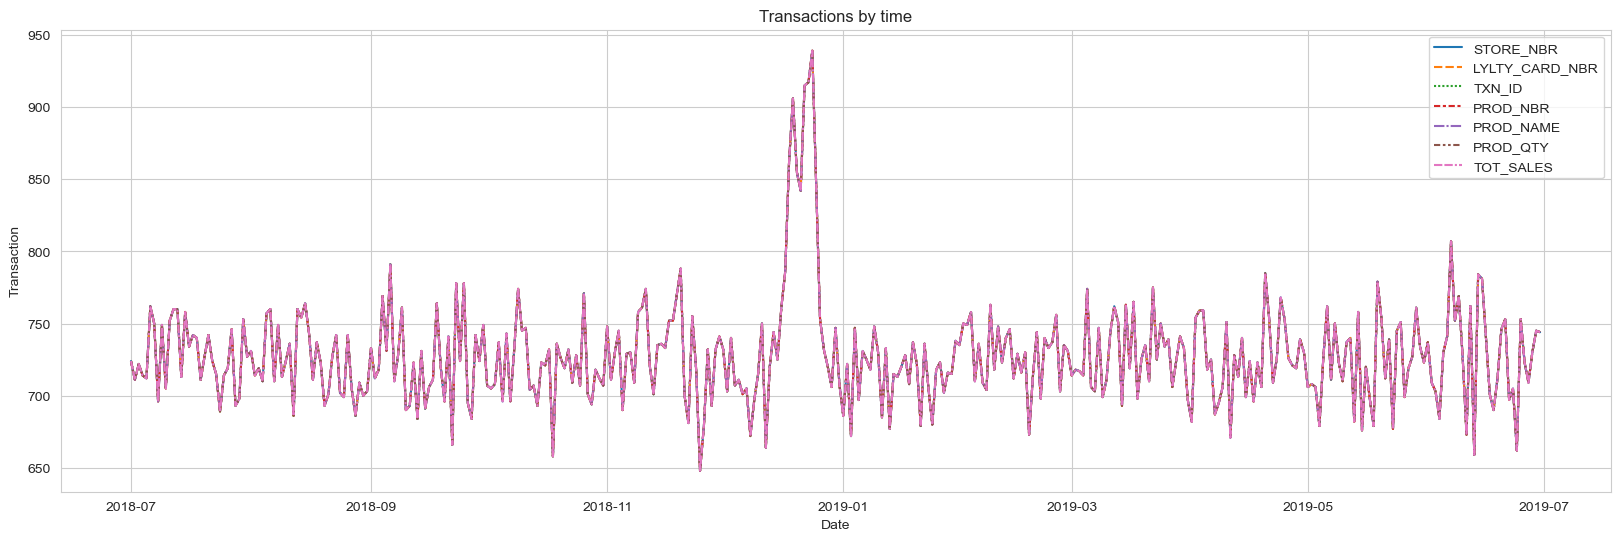

In [20]:
# Plot transactions over time
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
plt.title("Transactions by time")
sns.lineplot(data=trans_by_date)
plt.xlabel("Date")
plt.ylabel("Transaction")

It's evident that there's an uptick in purchases during December, followed by a pause towards the end of the month. Let's take a closer look at this specific timeframe.

The surge in sales aligns with the pre-Christmas period, and it's notable that there are no sales recorded on Christmas day. This absence of sales is attributed to store closures on Christmas day, making it a logical outcome. Consequently, there's no need to categorize this data point as an outlier. Moving forward, our focus will shift to generating additional features like chip brand or pack size derived from the "PROD_NAME" column.

In [21]:
# Getting Pack size from the PROD_NAME
trans_data["Pack Size"] = trans_data["PROD_NAME"].str.extract("([0-9]+)").astype("float")
trans_data["Pack Size"].head()

0    175.0
1    175.0
2    170.0
3    175.0
4    150.0
Name: Pack Size, dtype: float64

Text(0, 0.5, 'Number of Transactions')

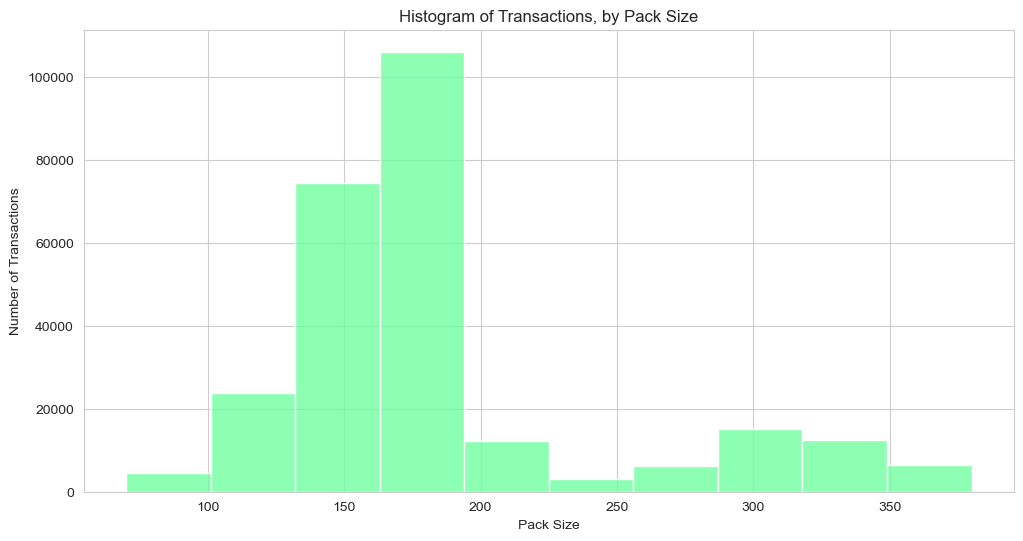

In [64]:
# Plot a histogram showing the number of transactions by pack size
plt.figure(figsize=(12,6))
sns.histplot(x=trans_data["Pack Size"], bins=10, kde=False,color='#66ff99')
plt.title("Histogram of Transactions, by Pack Size")
plt.xlabel("Pack Size")
plt.ylabel("Number of Transactions")

In [23]:
# Finding the brands from PROD_NAME
trans_data['Brand Name'] = trans_data['PROD_NAME'].str.split(' ').str[0]
trans_data["Brand Name"].head()

0    Natural
1        CCs
2     Smiths
3     Smiths
4     Kettle
Name: Brand Name, dtype: object

In [24]:
trans_data['Brand Name'].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: Brand Name, dtype: int64

In [25]:
# Clean brand names
def brand_rename(new,old):
    trans_data["Brand Name"].loc[trans_data["Brand Name"]==old] = new

brand_rename("Doritos","Dorito")
brand_rename("Grain Waves","Grain")
brand_rename("Grain Waves","GrnWves")
brand_rename("Infuzions","Infzns")
brand_rename("Natural Chip Co","NCC")
brand_rename("Natural Chip Co","Natural")
brand_rename("Red Rock Deli","Red")
brand_rename("Red Rock Deli","RRD")
brand_rename("Smiths","Smith")
brand_rename("Sunbites","Snbts")
brand_rename("Woolworths","WW")

# Check results
nbd = trans_data["Brand Name"].unique()
nbd.sort()
nbd

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'Grain Waves', 'Infuzions', 'Kettle', 'Natural Chip Co',
       'Old', 'Pringles', 'Red Rock Deli', 'Smiths', 'Sunbites', 'Thins',
       'Tostitos', 'Twisties', 'Tyrrells', 'Woolworths'], dtype=object)

Text(0.5, 0, 'Transaction')

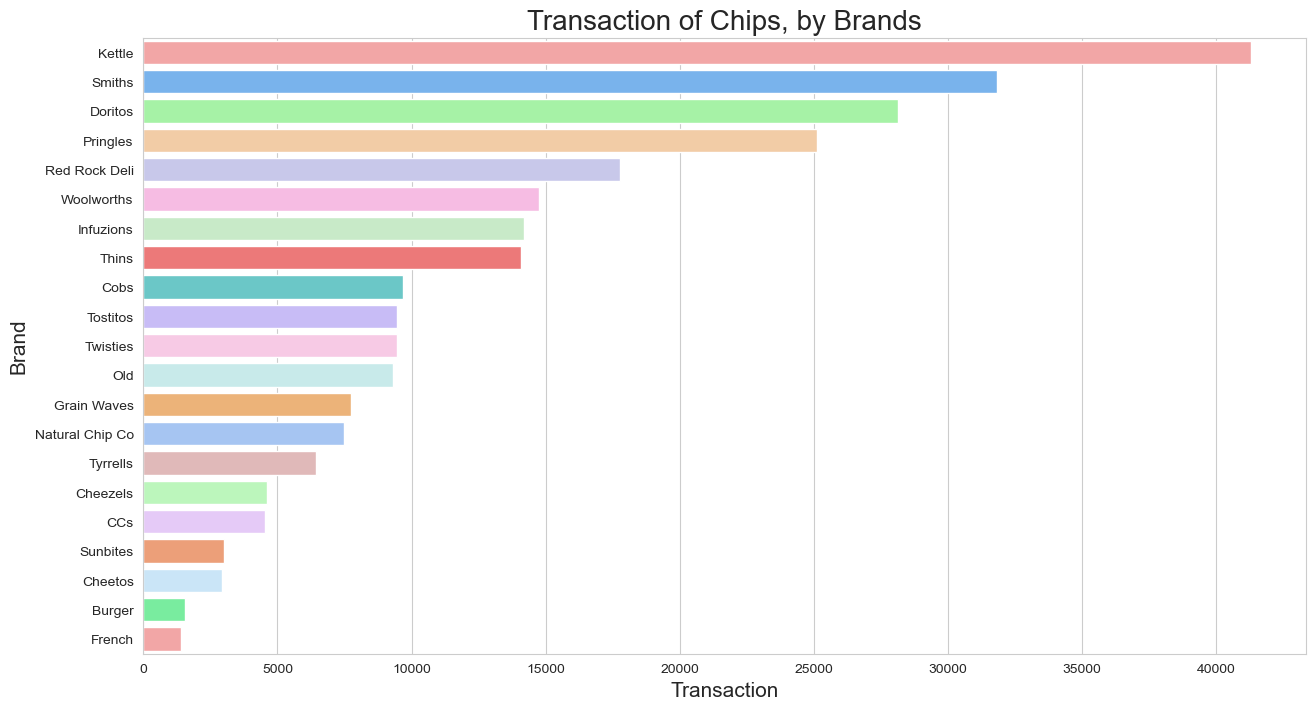

In [62]:
# Plot a barchart to show the total sales of each brand
plt.figure(figsize=(15,8))
custom_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2',
                  '#ff6666', '#5cd6d6', '#c2b3ff', '#ffc2e6', '#c2f0f0', '#ffb366', '#99c2ff',
                  '#e6b3b3', '#b3ffb3', '#e6c2ff', '#ff9966', '#c2e6ff', '#66ff99']

sns.barplot(x = trans_data["Brand Name"].value_counts(),y=trans_data["Brand Name"].value_counts().index,palette=custom_palette)
plt.title("Transaction of Chips, by Brands",fontsize=20)
plt.ylabel("Brand",fontsize=15)
plt.xlabel("Transaction",fontsize=15)

The bar chart clearly indicates that Kettle products the most popular chips.

In [27]:
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack Size,Brand Name
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle


## 2. Cleaning customer data

In [28]:
# Reading data
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [29]:
# Getting info
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [30]:
# Details of column LYLTY_CARD_NBR
purchase.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


Let's see the distribution of Lifestage & Customer type by using pie chart

Text(0.5, 1.0, 'Distribution of Lifestage')

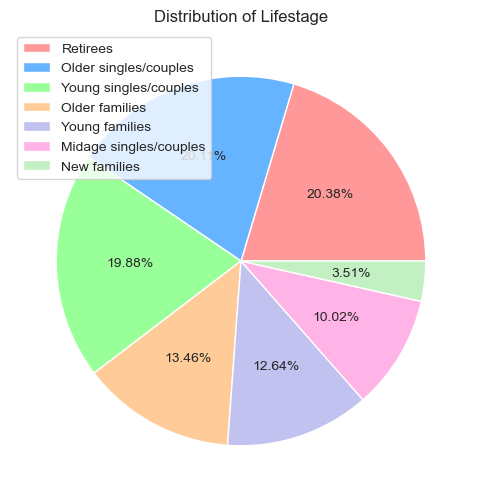

In [31]:
plt.figure(figsize=(6,6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']
plt.pie(purchase["LIFESTAGE"].value_counts(),autopct='%.2f%%',colors=colors)
plt.legend(purchase["LIFESTAGE"].value_counts().index.str.capitalize(),loc=2)
plt.title("Distribution of Lifestage")

Text(0.5, 1.0, 'Distribution of Customer Type')

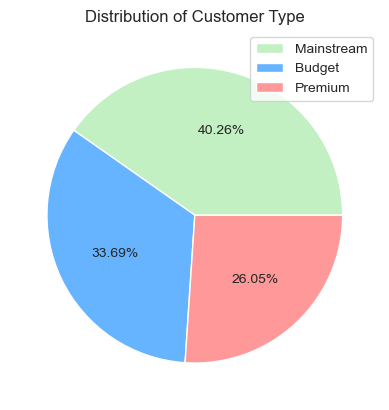

In [32]:
colors = ['#c2f0c2','#66b3ff','#ff9999']
plt.pie(purchase["PREMIUM_CUSTOMER"].value_counts(),autopct='%.2f%%',colors=colors)
plt.legend(purchase["PREMIUM_CUSTOMER"].value_counts().index.str.capitalize())
plt.title("Distribution of Customer Type")


In this table, we have a total of 72,637 customer samples. Among these customers, retirees make up the largest group at 20.38%, while new families comprise the smallest group at only 3.51%. In terms of customer types, Mainstream customers represent the majority, followed by Budget customers, and Premium customers bringing up the rear.

### 2）Merging two dataset using a common column LYLTY_CARD_NBR

In [33]:
# Merge trans_data to purchase
merge = pd.merge(trans_data,purchase,on="LYLTY_CARD_NBR")
merge.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack Size,Brand Name,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [34]:
merge.count()

DATE                264834
STORE_NBR           264834
LYLTY_CARD_NBR      264834
TXN_ID              264834
PROD_NBR            264834
PROD_NAME           264834
PROD_QTY            264834
TOT_SALES           264834
Pack Size           264834
Brand Name          264834
LIFESTAGE           264834
PREMIUM_CUSTOMER    264834
dtype: int64

In [35]:
# Check if some customers were not matched on by checking for nulls
merge.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
Pack Size           0
Brand Name          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

 There are no missing values. This means that all of our customers in the transaction data have been successfully matched with the purchase behavior dataset

### 3）Save the merger as csv

In [36]:
# save as csv
merge.to_csv("merger.csv")

## 3. Data analysis on purchase behaviour

### Overall sales

We'll begin by computing the total sales categorized by LIFESTAGE and PREMIUM_CUSTOMER. Then, we'll create a visual representation of this breakdown to illustrate which customer segment plays the most significant role in chip sales.

In [37]:
#  Calculate the total sales by those dimensions
totsales = pd.DataFrame(merge.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"])["TOT_SALES"].sum())
totsales

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           MIDAGE SINGLES/COUPLES   35514.80
                 NEW FAMILIES             21928.45
                 OLDER FAMILIES          168363.25
                 OLDER SINGLES/COUPLES   136769.80
                 RETIREES                113147.80
                 YOUNG FAMILIES          139345.85
                 YOUNG SINGLES/COUPLES    61141.60
Mainstream       MIDAGE SINGLES/COUPLES   90803.85
                 NEW FAMILIES             17013.90
                 OLDER FAMILIES          103445.55
                 OLDER SINGLES/COUPLES   133393.80
                 RETIREES                155677.05
                 YOUNG FAMILIES           92788.75
                 YOUNG SINGLES/COUPLES   157621.60
Premium          MIDAGE SINGLES/COUPLES   58432.65
                 NEW FAMILIES             11491.10
                 OLDER FAMILIES           80658.40
                 OLDER SINGLES/COUPLES   132263.15
                 RETIREES                 97646.05
                 YOUNG FAMILIES           84025.50
                 YOUNG SINGLES/COUPLES    41642.10

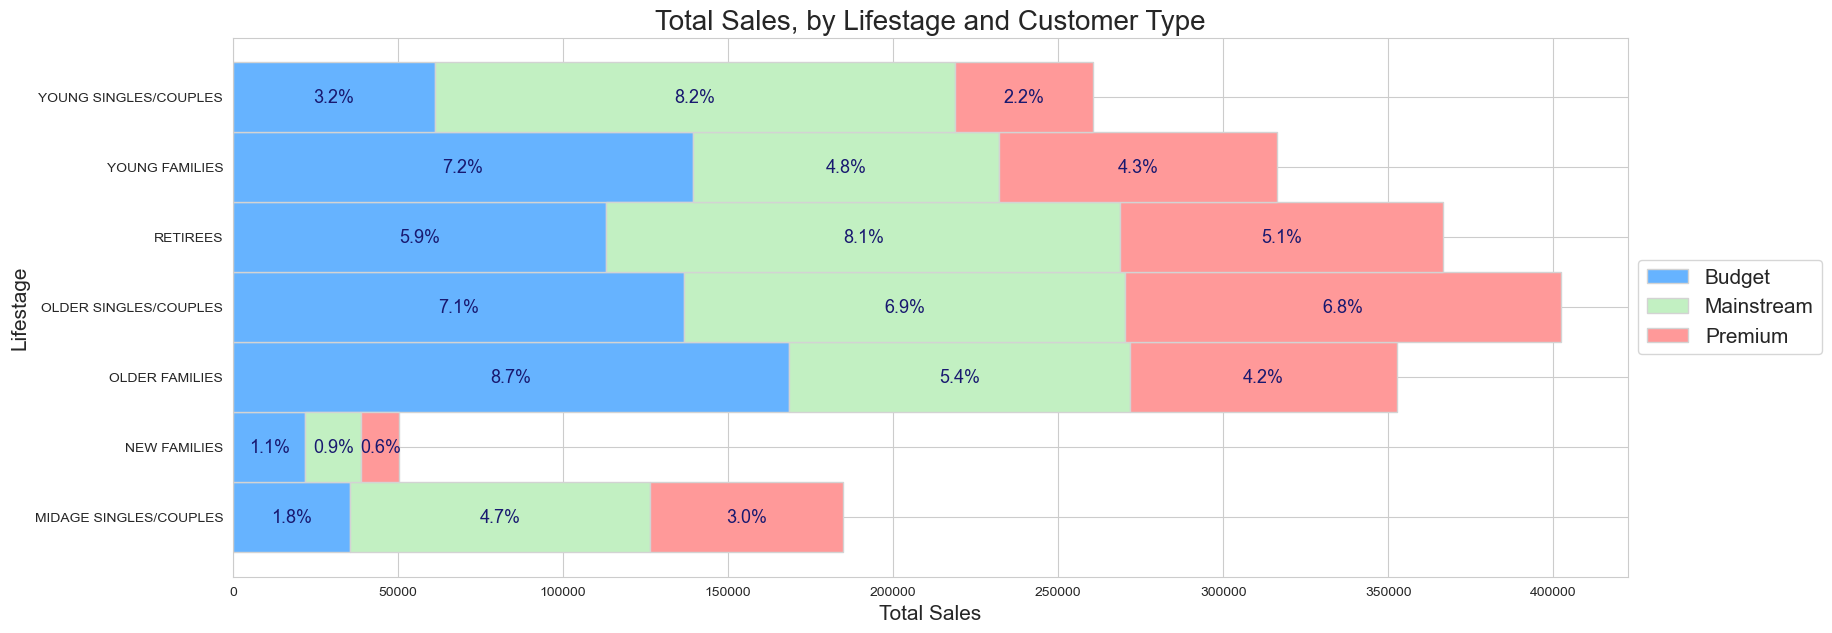

In [38]:
bars1 = totsales[totsales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["TOT_SALES"]
bars2 = totsales[totsales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["TOT_SALES"]
bars3 = totsales[totsales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["TOT_SALES"]
 
bars1_text = (bars1 / sum(totsales["TOT_SALES"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(totsales["TOT_SALES"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(totsales["TOT_SALES"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = totsales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['#c2f0c2','#66b3ff','#ff9999']

budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")

mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")

prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["LIFESTAGE"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Total Sales",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Total Sales, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()


### Count of Customer

In [39]:
#  Calculate the count of customer for each segment
count = pd.DataFrame(purchase.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"]).count())
count.columns=["COUNT_OF_CUSTOMERS"]
count

COUNT_OF_CUSTOMERS
PREMIUM_CUSTOMER LIFESTAGE                                 
Budget           MIDAGE SINGLES/COUPLES                1504
                 NEW FAMILIES                          1112
                 OLDER FAMILIES                        4675
                 OLDER SINGLES/COUPLES                 4929
                 RETIREES                              4454
                 YOUNG FAMILIES                        4017
                 YOUNG SINGLES/COUPLES                 3779
Mainstream       MIDAGE SINGLES/COUPLES                3340
                 NEW FAMILIES                           849
                 OLDER FAMILIES                        2831
                 OLDER SINGLES/COUPLES                 4930
                 RETIREES                              6479
                 YOUNG FAMILIES                        2728
                 YOUNG SINGLES/COUPLES                 8088
Premium          MIDAGE SINGLES/COUPLES                2431
                 NEW FAMILIES                           588
                 OLDER FAMILIES                        2274
                 OLDER SINGLES/COUPLES                 4750
                 RETIREES                              3872
                 YOUNG FAMILIES                        2433
                 YOUNG SINGLES/COUPLES                 2574

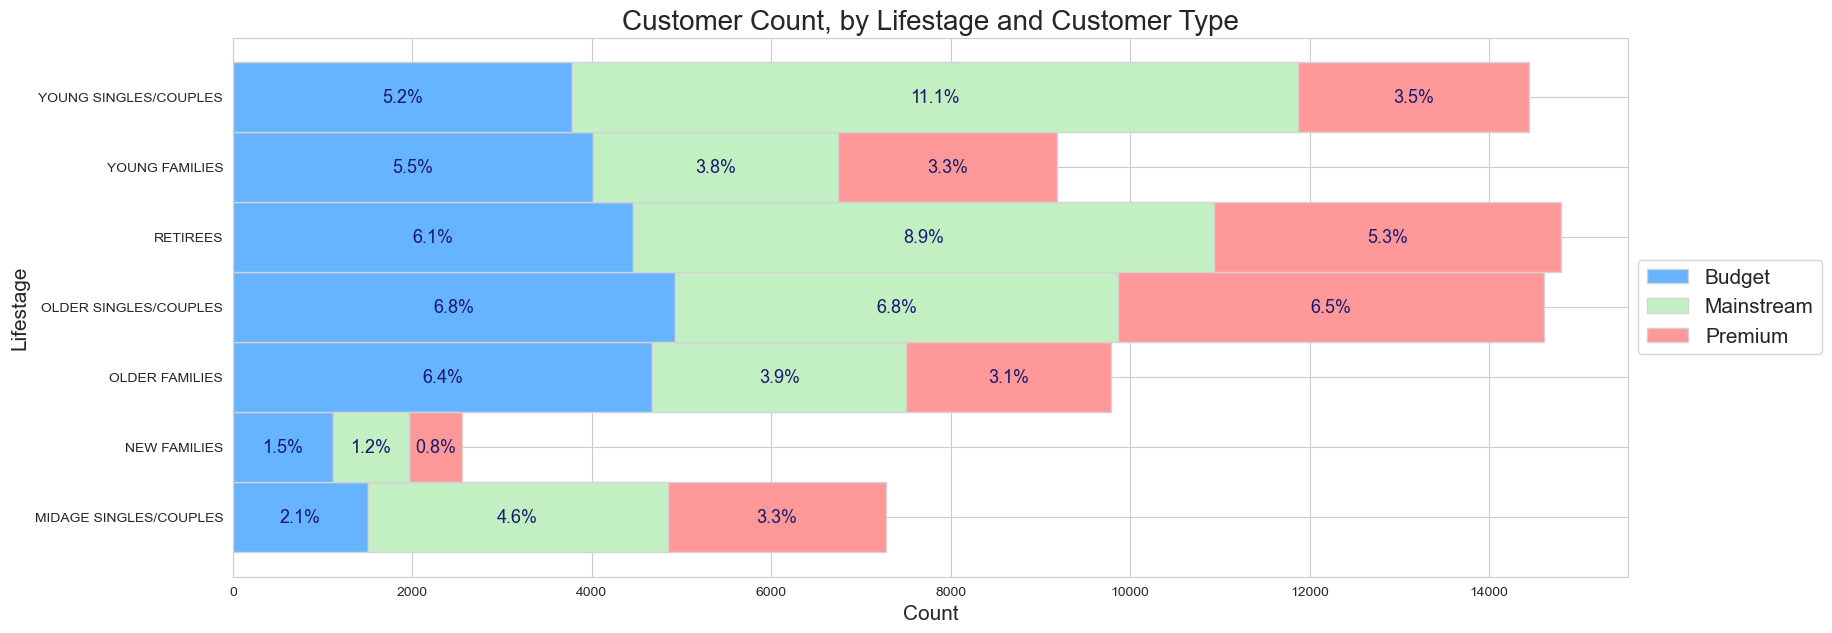

In [40]:
bars1 = count[count.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["COUNT_OF_CUSTOMERS"]
bars2 = count[count.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["COUNT_OF_CUSTOMERS"]
bars3 = count[count.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["COUNT_OF_CUSTOMERS"]
 
bars1_text = (bars1 / sum(count["COUNT_OF_CUSTOMERS"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(count["COUNT_OF_CUSTOMERS"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(count["COUNT_OF_CUSTOMERS"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = count.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['#c2f0c2','#66b3ff','#ff9999']

budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")

mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")

prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["LIFESTAGE"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Customer Count, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

It's evident that Mainstream - young singles/couples and Mainstream - retirees are the primary purchasers of chips, resulting in higher sales within these customer segments. However, this trend doesn't significantly impact the Budget - Older families segment in terms of chip sales.

### Average Sales Quantity

Increased sales might also be attributed to a higher number of chip units purchased per customer. Let's investigate this aspect next.

In [41]:
# Calculate the average number of units per customer 
merge_data = pd.merge(totsales,count,on=["PREMIUM_CUSTOMER","LIFESTAGE"])
merge_data['SALES_QTY'] = merge.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"])["PROD_QTY"].sum()
merge_data['AVG_SALES_QTY'] = (merge_data["SALES_QTY"]/merge_data["COUNT_OF_CUSTOMERS"])
merge_data

TOT_SALES  COUNT_OF_CUSTOMERS  \
PREMIUM_CUSTOMER LIFESTAGE                                               
Budget           MIDAGE SINGLES/COUPLES   35514.80                1504   
                 NEW FAMILIES             21928.45                1112   
                 OLDER FAMILIES          168363.25                4675   
                 OLDER SINGLES/COUPLES   136769.80                4929   
                 RETIREES                113147.80                4454   
                 YOUNG FAMILIES          139345.85                4017   
                 YOUNG SINGLES/COUPLES    61141.60                3779   
Mainstream       MIDAGE SINGLES/COUPLES   90803.85                3340   
                 NEW FAMILIES             17013.90                 849   
                 OLDER FAMILIES          103445.55                2831   
                 OLDER SINGLES/COUPLES   133393.80                4930   
                 RETIREES                155677.05                6479   
                 YOUNG FAMILIES           92788.75                2728   
                 YOUNG SINGLES/COUPLES   157621.60                8088   
Premium          MIDAGE SINGLES/COUPLES   58432.65                2431   
                 NEW FAMILIES             11491.10                 588   
                 OLDER FAMILIES           80658.40                2274   
                 OLDER SINGLES/COUPLES   132263.15                4750   
                 RETIREES                 97646.05                3872   
                 YOUNG FAMILIES           84025.50                2433   
                 YOUNG SINGLES/COUPLES    41642.10                2574   

                                         SALES_QTY  AVG_SALES_QTY  
PREMIUM_CUSTOMER LIFESTAGE                                         
Budget           MIDAGE SINGLES/COUPLES       9496       6.313830  
                 NEW FAMILIES                 5571       5.009892  
                 OLDER FAMILIES              45065       9.639572  
                 OLDER SINGLES/COUPLES       35220       7.145466  
                 RETIREES                    28764       6.458015  
                 YOUNG FAMILIES              37111       9.238486  
                 YOUNG SINGLES/COUPLES       16671       4.411485  
Mainstream       MIDAGE SINGLES/COUPLES      22699       6.796108  
                 NEW FAMILIES                 4319       5.087161  
                 OLDER FAMILIES              27756       9.804309  
                 OLDER SINGLES/COUPLES       34997       7.098783  
                 RETIREES                    40518       6.253743  
                 YOUNG FAMILIES              25044       9.180352  
                 YOUNG SINGLES/COUPLES       38632       4.776459  
Premium          MIDAGE SINGLES/COUPLES      15526       6.386672  
                 NEW FAMILIES                 2957       5.028912  
                 OLDER FAMILIES              21771       9.573879  
                 OLDER SINGLES/COUPLES       33986       7.154947  
                 RETIREES                    24884       6.426653  
                 YOUNG FAMILIES              22406       9.209207  
                 YOUNG SINGLES/COUPLES       11331       4.402098

Text(0, 0.5, 'Average Sales Quantity')

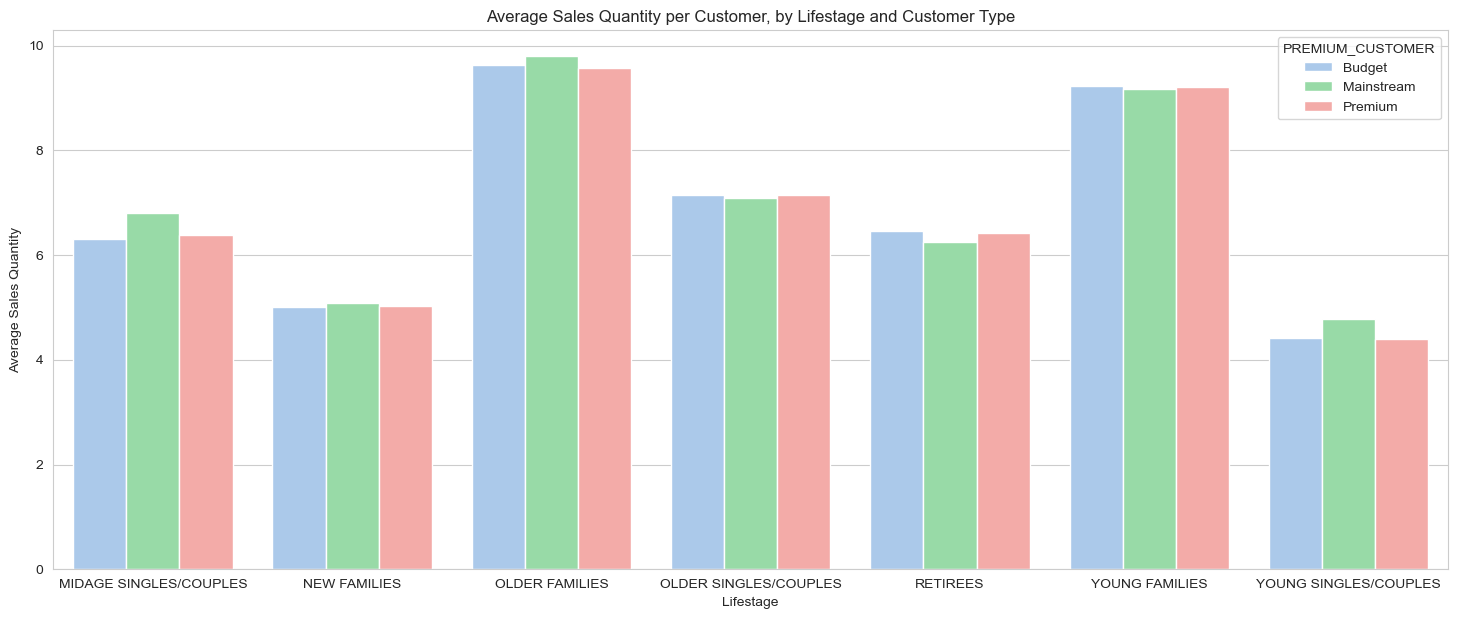

In [42]:
# Plot the average number of units per customer 

plt.figure(figsize=(18,7))
sns.barplot( y=merge_data.reset_index()["AVG_SALES_QTY"], x=merge_data.reset_index()["LIFESTAGE"],
            hue=merge_data.reset_index()["PREMIUM_CUSTOMER"], palette=sns.color_palette("pastel6"))
plt.title("Average Sales Quantity per Customer, by Lifestage and Customer Type")
plt.xlabel("Lifestage")
plt.ylabel("Average Sales Quantity")

Older families and young families in general buy more chips per customer.

### Average sales price

We should also explore the average price per unit of chips bought within each customer segment, as this factor plays a crucial role in determining the total sales.

In [43]:
# Calculate the average price
merge_data['AVG_SALES_PRICE'] = (merge_data["TOT_SALES"]/merge_data["SALES_QTY"])
merge

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack Size,Brand Name,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos,YOUNG SINGLES/COUPLES,Premium


Text(0, 0.5, 'Average Sales Price')

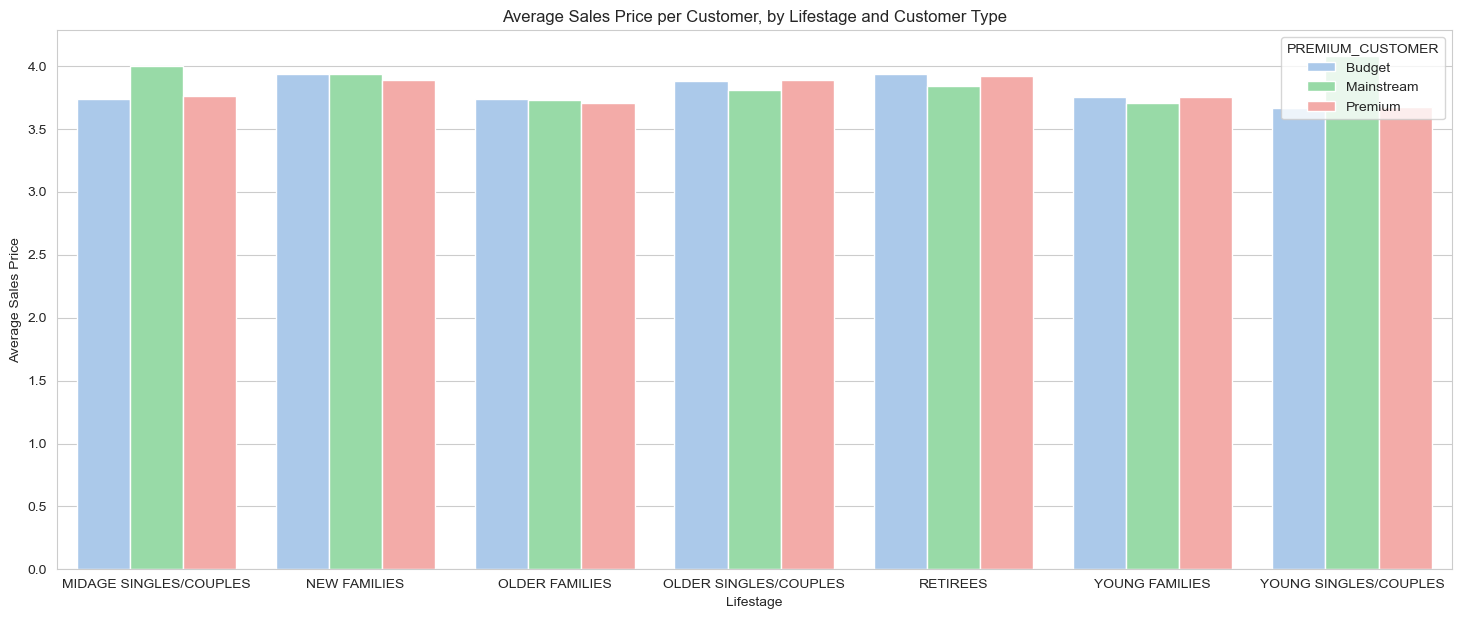

In [44]:
# Plot the average price 
plt.figure(figsize=(18,7))
sns.barplot( y=merge_data.reset_index()["AVG_SALES_PRICE"], x=merge_data.reset_index()["LIFESTAGE"],
            hue=merge_data.reset_index()["PREMIUM_CUSTOMER"],palette=sns.color_palette("pastel6"))
plt.title("Average Sales Price per Customer, by Lifestage and Customer Type")
plt.xlabel("Lifestage")
plt.ylabel("Average Sales Price")

## 4. Specific customer segments insights

To maintain or boost sales, it would be beneficial to focus on customer segments that contribute the most. For instance, let's explore Mainstream - young singles/couples. We can analyze whether they show a preference for specific chip brands and whether they tend to purchase larger chip packs.

In [45]:
# Brands and package sizes of 'Mainstream - young singles/couples' 
ysc = pd.DataFrame(merge.loc[:,["LYLTY_CARD_NBR","LIFESTAGE","PREMIUM_CUSTOMER","Brand Name","Pack Size","PROD_QTY"]])
main = ysc[(ysc["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")&(ysc["PREMIUM_CUSTOMER"]=="Mainstream")]
main.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,Brand Name,Pack Size,PROD_QTY
237700,1020,YOUNG SINGLES/COUPLES,Mainstream,Smiths,150.0,1
237701,1020,YOUNG SINGLES/COUPLES,Mainstream,Smiths,330.0,1
237702,1020,YOUNG SINGLES/COUPLES,Mainstream,Grain Waves,180.0,1
237703,1163,YOUNG SINGLES/COUPLES,Mainstream,Kettle,175.0,1
237704,1163,YOUNG SINGLES/COUPLES,Mainstream,Natural Chip Co,175.0,1


In [46]:
# Most popular brands
main["Brand Name"].value_counts().head(3)

Kettle      3844
Doritos     2541
Pringles    2315
Name: Brand Name, dtype: int64

In [47]:
# Most popular package sizes
main["Pack Size"].value_counts().head(3)

175.0    4997
150.0    3241
134.0    2315
Name: Pack Size, dtype: int64

In the 'Mainstream - young singles/couples' segment, the top-selling brands are Kettle, Doritos, and Pringles. When it comes to package sizes, the most commonly chosen options are 175g, 150g, and 134g.

# Recommendations

* Increase sales promotion of Kettle (all size) and 175g (all brands) chips

# Target segments 

## Budget - Older Families :<br>

Promotions such as 'Buy Two Get One Free' can have a positive impact on sales due to their ability to increase the average purchase quantity, thereby boosting overall revenue.

## Mainstream - Young Singles/Couples:

To effectively reach the majority of our customer base within the Mainstream - Young Singles/Couples segment, we recommend the following strategies:

#### * Targeted Advertising:
Focus your marketing efforts on areas with a high concentration of this segment, such as colleges and universities. Tailor your advertisements to resonate with the preferences and lifestyles of young singles and couples.

#### * Strategic Placement:
Increase product visibility by strategically placing chips alongside daily necessities commonly purchased by young individuals. This can capture their attention and lead to increased sales.

#### * Promotions and Repackaging:
Capitalize on the popularity of brands like Doritos and Pringles within this segment. Implement promotions and collaborate with manufacturers and suppliers to revamp packaging, incorporating vibrant colors and fonts that appeal to the youth demographic. This strategy can extend to both 150g and 134g chip sizes.

 By combining these strategies, you can maximize their synergistic effects and better connect with the Mainstream - Young Singles/Couples segment, driving sales growth.


## Mainstream - Retirees:

To effectively engage with the Mainstream - Retirees segment, consider the following strategies:

#### * Targeted Advertising:
Given the substantial customer base within this segment, targeted advertising remains a key strategy. Tailor your advertisements to appeal to the preferences and interests of retirees.

#### * Daytime Sales Promotions:
Recognize that retired customers are more likely to shop during daytime hours. Plan limited-time sales promotions during these hours, focusing on products that are popular within this segment. This approach can encourage higher sales when retirees are more active in stores.

By combining targeted advertising with daytime promotions, you can optimize your marketing efforts and cater to the specific needs and behaviors of the Mainstream - Retirees segment, ultimately boosting sales.